### The main focus here is to discover the main factors of a high grossing movie

### Initial Guess: Picture( affected by budget), Script, Actor(popularity and acting skill), and director.

In [110]:
reset -fs

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [232]:
movies = pd.read_csv('https://raw.githubusercontent.com/sundeepblue/movie_rating_prediction/master/movie_metadata.csv')
movies.columns = [column.lower() for column in movies.columns]
movies.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


In [234]:
movies.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


Ave imdb score is 6.44

Ave budget is 3.9 million

Ave gross is 4.8 million

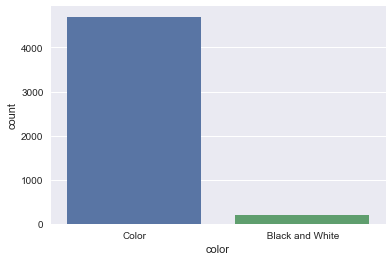

In [239]:
sns.countplot(x="color", data = movies);

### Reason to remove: the data given for actors' facebook likes are incomplete. There are many famous actors do not have facebook account. Therefore, the 3 actors listed in the data might not be the 3 main charactors. Also, the popularity of an actor cannot be simply evaluated by the his/her facebook likes. So facebook_likes are not very good predictors overall.

In [235]:
col= movies.columns.tolist()
newcol=[]
removeset = ('color',
             'actor_1_facebook_likes',
           'actor_2_facebook_likes',
           'actor_3_facebook_likes',
           'actor_1_facebook_likes',
          'director_facebook_likes',
          'cast_total_facebook_likes',
          'movie_imdb_link',
          'aspect_ratio',
          'movie_facebook_likes')
for item in col:
    if item not in removeset:
        newcol.append(item)
    
print(newcol)

['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'imdb_score']


### To avoid currency and inflation issues. I decided to do movies that are only made in USA and after the year of 1990.

In [236]:
movies = movies.fillna(movies.median()).drop_duplicates(['movie_title','title_year'])
movies_usa = movies[movies.country == 'USA'][movies.imdb_score >6.4][movies.title_year>1990]
movies_usa.head(2)

/Users/DL/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


In [237]:
movies_usa=movies_usa.sort_values(by=['gross'], ascending=False)[newcol]
movies_usa.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score
0,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9
26,James Cameron,315.0,194.0,Kate Winslet,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,Gloria Stuart,0.0,artist|love|ship|titanic|wet,2528.0,English,USA,PG-13,200000000.0,1997.0,7.7
29,Colin Trevorrow,644.0,124.0,Judy Greer,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,1290.0,English,USA,PG-13,150000000.0,2015.0,7.0
17,Joss Whedon,703.0,173.0,Robert Downey Jr.,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,1722.0,English,USA,PG-13,220000000.0,2012.0,8.1
66,Christopher Nolan,645.0,152.0,Heath Ledger,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,Morgan Freeman,0.0,based on comic book|dc comics|psychopath|star ...,4667.0,English,USA,PG-13,185000000.0,2008.0,9.0


In [252]:
movies_usa.describe()

,num_critic_for_reviews,duration,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score
count,1587.000000,1587.000000,1.587000e+03,1.587000e+03,1587.000000,1587.000000,1.587000e+03,1587.000000,1587.000000
mean,186.249527,110.208570,6.268840e+07,1.427902e+05,1.335854,395.061752,4.007207e+07,2005.448645,7.167297
std,146.075023,27.243889,8.303098e+07,1.923013e+05,2.215671,492.972655,4.715842e+07,6.357100,0.528442
min,1.000000,11.000000,1.111000e+03,5.000000e+00,0.000000,1.000000,2.180000e+02,1991.000000,6.500000
25%,77.500000,96.000000,1.102594e+07,2.129100e+04,0.000000,112.000000,1.000000e+07,2001.000000,6.700000
50%,154.000000,108.000000,3.114657e+07,7.364000e+04,1.000000,242.000000,2.000000e+07,2006.000000,7.100000
75%,258.500000,123.000000,8.140479e+07,1.887320e+05,2.000000,502.500000,5.000000e+07,2011.000000,7.500000
max,813.000000,330.000000,7.605058e+08,1.689764e+06,43.000000,4667.000000,3.000000e+08,2016.000000,9.300000


### Use imdb_score as a general evaluation of how good the script and actors' acting skill are.

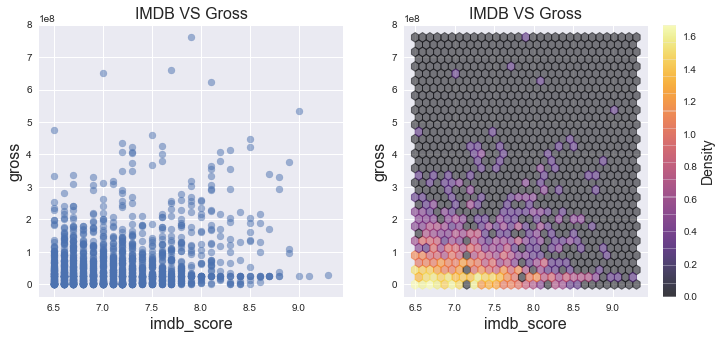

In [240]:
x = movies_usa['imdb_score']
y = movies_usa['gross']
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5))

ax1.scatter(x,y,alpha=0.5)
ax1.set_title('IMDB VS Gross',fontsize=16)
ax1.set_xlabel('imdb_score',fontsize=16)
ax1.set_ylabel('gross',fontsize=16)
hxb=ax2.hexbin(x,y,alpha=0.5,cmap='inferno',bins='log',gridsize=30)
ax2.set_title('IMDB VS Gross',fontsize=16)
ax2.set_xlabel('imdb_score',fontsize=16)
ax2.set_ylabel('gross',fontsize=16)
cb = f.colorbar(hxb, ax=ax2)
cb.set_label('Density',fontsize=14)

In [118]:
g_score_model = ols("gross ~ imdb_score", data=movies_usa).fit()
g_score_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     78.89
Date:                Wed, 08 Mar 2017   Prob (F-statistic):           1.39e-18
Time:                        19:23:16   Log-Likelihood:                -40763.
No. Observations:                2083   AIC:                         8.153e+04
Df Residuals:                    2081   BIC:                         8.154e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1.112e+08   1.93e+07     -5.768      0.000     -1.49e+08 -7.34e+07
imdb_score  2.455e+07   2.76e+06      8.882      0.000      1.91e+07     3e+07
==============================================================================
Omnibus:                     1261.524   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13948.601
Skew:                           2.707   Prob(JB):                         0.00
Kurtosis:                      14.463   Cond. No.                         82.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Budget should be a big factor!! Because more money means better picture and better actors

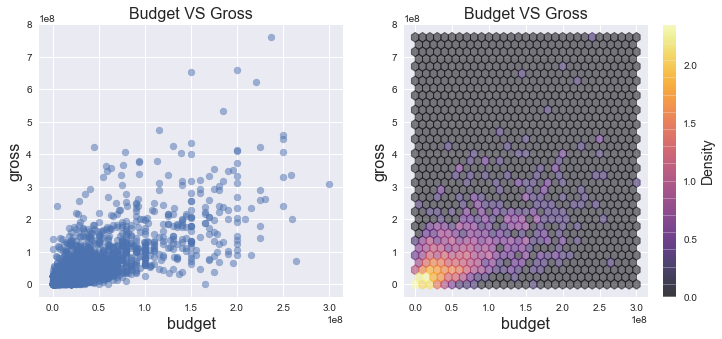

In [119]:
x = movies_usa['budget']
y = movies_usa['gross']
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,5))

ax1.scatter(x,y,alpha=0.5)
ax1.set_title('Budget VS Gross',fontsize=16)
ax1.set_xlabel('budget',fontsize=16)
ax1.set_ylabel('gross',fontsize=16)
hxb=ax2.hexbin(x,y,alpha=0.5,cmap='inferno',bins='log',gridsize=30)
ax2.set_title('Budget VS Gross',fontsize=16)
ax2.set_xlabel('budget',fontsize=16)
ax2.set_ylabel('gross',fontsize=16)
cb = f.colorbar(hxb, ax=ax2)
cb.set_label('Density',fontsize=14)

In [226]:
g_b_model = ols("gross ~ budget", data=movies_usa).fit()
g_b_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     2216.
Date:                Wed, 08 Mar 2017   Prob (F-statistic):               0.00
Time:                        20:56:48   Log-Likelihood:                -40047.
No. Observations:                2083   AIC:                         8.010e+04
Df Residuals:                    2081   BIC:                         8.011e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.061e+07   1.58e+06      6.739      0.000      7.52e+06  1.37e+07
budget         1.2165      0.026     47.074      0.000         1.166     1.267
==============================================================================
Omnibus:                     1151.905   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16826.940
Skew:                           2.283   Prob(JB):                         0.00
Kurtosis:                      16.154   Cond. No.                     8.09e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Rating could also be a factor of how a movie sells.

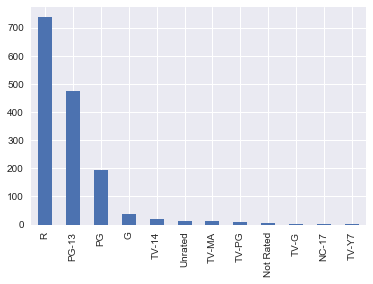

In [251]:
movies_usa['content_rating'].value_counts().plot(kind = 'bar');

In [122]:
movies_rate=movies_usa[movies_usa.content_rating.isin(['R','PG-13'])]
movies_rate.content_rating.value_counts()

R        945
PG-13    669
Name: content_rating, dtype: int64

In [123]:
smf.ols(formula="gross ~ content_rating+budget+imdb_score", data=movies_rate).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     663.0
Date:                Wed, 08 Mar 2017   Prob (F-statistic):          1.42e-280
Time:                        19:23:17   Log-Likelihood:                -30939.
No. Observations:                1614   AIC:                         6.189e+04
Df Residuals:                    1610   BIC:                         6.191e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept           -1.511e+08    1.5e+07    -10.047      0.000     -1.81e+08 -1.22e+08
content_rating[T.R] -1.386e+07   2.78e+06     -4.986      0.000     -1.93e+07 -8.41e+06
budget                  1.1670      0.031     37.677      0.000         1.106     1.228
imdb_score           2.476e+07   2.18e+06     11.344      0.000      2.05e+07   2.9e+07
==============================================================================
Omnibus:                      871.855   Durbin-Watson:                   1.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13711.901
Skew:                           2.164   Prob(JB):                         0.00
Kurtosis:                      16.607   Cond. No.                     7.02e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.02e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

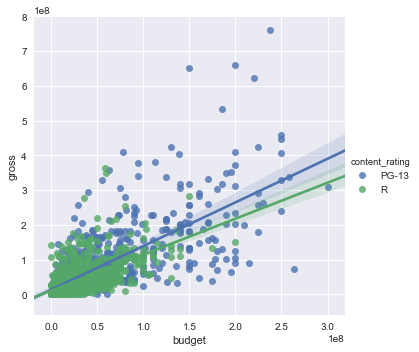

In [248]:
sns.lmplot(x='budget',y='gross',hue='content_rating',data=movies_rate);

__$H_0$:  The gross income of movies will not be affected by year__

__$H_a$:  The gross income of movies will be affected by year__

In [125]:
movie_year=movies_rate[movies_rate.title_year > 2010]
movie_year.describe()

,num_critic_for_reviews,duration,gross,num_voted_users,facenumber_in_poster,num_user_for_reviews,budget,title_year,imdb_score
count,421.000000,421.000000,4.210000e+02,4.210000e+02,421.000000,421.000000,4.210000e+02,421.000000,421.000000
mean,302.724466,114.712589,7.195692e+07,1.559756e+05,1.707838,361.938242,4.886935e+07,2013.137767,6.912589
std,168.948245,20.997405,9.086541e+07,1.682143e+05,2.601769,397.801088,5.724767e+07,1.529091,0.585343
min,1.000000,75.000000,3.330000e+03,6.000000e+00,0.000000,1.000000,4.200000e+04,2011.000000,6.100000
25%,178.000000,100.000000,1.773857e+07,4.128800e+04,0.000000,118.000000,1.200000e+07,2012.000000,6.500000
50%,285.000000,111.000000,4.100853e+07,1.012870e+05,1.000000,242.000000,2.800000e+07,2013.000000,6.800000
75%,415.000000,126.000000,8.689718e+07,2.122040e+05,2.000000,461.000000,6.000000e+07,2014.000000,7.300000
max,813.000000,240.000000,6.521773e+08,1.144337e+06,31.000000,3018.000000,2.637000e+08,2016.000000,8.600000


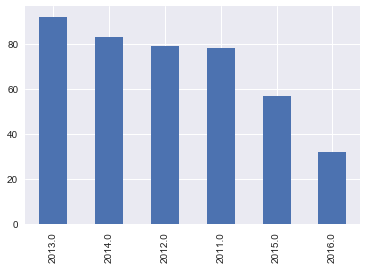

In [126]:
movie_year.title_year.value_counts().plot(kind = 'bar');

In [223]:
movie_year.title_year=movie_year.title_year.astype(str)

/Users/DL/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [224]:
movie_year.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score
29,Colin Trevorrow,644.0,124.0,Judy Greer,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,1290.0,English,USA,PG-13,150000000.0,2015.0,7.0
17,Joss Whedon,703.0,173.0,Robert Downey Jr.,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,1722.0,English,USA,PG-13,220000000.0,2012.0,8.1
8,Joss Whedon,635.0,141.0,Robert Downey Jr.,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,1117.0,English,USA,PG-13,250000000.0,2015.0,7.5
3,Christopher Nolan,813.0,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,English,USA,PG-13,250000000.0,2012.0,8.5
186,Francis Lawrence,502.0,146.0,Josh Hutcherson,424645577.0,Adventure|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games: Catching Fire,498397,Sandra Ellis Lafferty,1.0,president|snow|television|tour|uprising,706.0,English,USA,PG-13,130000000.0,2013.0,7.6


In [131]:
smf.ols(formula="gross ~ title_year", data=movie_year).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8555
Date:                Wed, 08 Mar 2017   Prob (F-statistic):              0.511
Time:                        19:24:10   Log-Likelihood:                -8309.5
No. Observations:                 421   AIC:                         1.663e+04
Df Residuals:                     415   BIC:                         1.666e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept             6.181e+07   1.03e+07      6.002      0.000      4.16e+07   8.2e+07
title_year[T.2012.0]  1.756e+07   1.45e+07      1.210      0.227      -1.1e+07  4.61e+07
title_year[T.2013.0]  5.168e+06    1.4e+07      0.369      0.712     -2.23e+07  3.27e+07
title_year[T.2014.0]  3.483e+06   1.43e+07      0.243      0.808     -2.47e+07  3.17e+07
title_year[T.2015.0]  2.228e+07   1.58e+07      1.406      0.161     -8.87e+06  5.34e+07
title_year[T.2016.0]  2.659e+07   1.91e+07      1.393      0.165     -1.09e+07  6.41e+07
==============================================================================
Omnibus:                      261.213   Durbin-Watson:                   0.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2007.439
Skew:                           2.665   Prob(JB):                         0.00
Kurtosis:                      12.275   Cond. No.                         6.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
movies_df = movies_rate.query("title_year > 1990")
dummies = pd.get_dummies(movies_df['director_name'], prefix="director" )
movies_df = movies_df.join(dummies)
movies_df.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score,director_Aaron Schneider,director_Abel Ferrara,director_Adam McKay,director_Adam Rapp,director_Adam Rifkin,director_Adrian Lyne,...,director_Udayan Prasad,director_Ulu Grosbard,director_Vadim Perelman,director_Vera Farmiga,director_Victor Nunez,director_Vincent Gallo,director_Vincent Ward,director_Vincenzo Natali,director_Walter Hill,director_Warren Beatty,director_Wayne Kramer,director_Wayne Wang,director_Werner Herzog,director_Wes Anderson,director_Wes Ball,director_Wes Craven,director_Will Gluck,director_William Eubank,director_William Friedkin,director_William H. Macy,director_Wolfgang Petersen,director_Woody Allen,director_Zach Braff,director_Zack Snyder,director_Zal Batmanglij
0,James Cameron,723.0,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,7.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,James Cameron,315.0,194.0,Kate Winslet,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,Gloria Stuart,0.0,artist|love|ship|titanic|wet,2528.0,English,USA,PG-13,200000000.0,1997.0,7.7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29,Colin Trevorrow,644.0,124.0,Judy Greer,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,1290.0,English,USA,PG-13,150000000.0,2015.0,7.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,Joss Whedon,703.0,173.0,Robert Downey Jr.,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,1722.0,English,USA,PG-13,220000000.0,2012.0,8.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66,Christopher Nolan,645.0,152.0,Heath Ledger,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,Morgan Freeman,0.0,based on comic book|dc comics|psychopath|star ...,4667.0,English,USA,PG-13,185000000.0,2008.0,9.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [220]:
movies_df.rename(columns = {'director_Steven Spielberg':'ss'}, inplace=True)
len(movies_df.query("ss == 1"))

14

In [218]:
smf.logit(formula="ss ~ gross", data=movies_df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.045995
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     ss   No. Observations:                 1614
Model:                          Logit   Df Residuals:                     1612
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Mar 2017   Pseudo R-squ.:                 0.07670
Time:                        20:25:59   Log-Likelihood:                -74.236
converged:                       True   LL-Null:                       -80.403
                                        LLR p-value:                 0.0004450
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.3464      0.352    -15.177      0.000        -6.037    -4.656
gross       6.555e-09   1.51e-09      4.327      0.000      3.59e-09  9.52e-09
==============================================================================
"""

In [ ]:
movies_df.rename(columns = {'director_Quentin Tarantino':'qt'}, inplace=True)

In [222]:
smf.logit(formula="qt ~ imdb_score", data=movies_df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.022022
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     qt   No. Observations:                 1614
Model:                          Logit   Df Residuals:                     1612
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Mar 2017   Pseudo R-squ.:                  0.2953
Time:                        20:31:12   Log-Likelihood:                -35.544
converged:                       True   LL-Null:                       -50.436
                                        LLR p-value:                 4.825e-08
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -27.0878      4.862     -5.571      0.000       -36.618   -17.558
imdb_score     2.8899      0.596      4.851      0.000         1.722     4.058
==============================================================================
"""